# Load dataset

In [1]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

Using TensorFlow backend.


X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


# Model 1: base model

In [2]:
# storing loss of all models
hist = {}

In [3]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [4]:
## TODO: Specify a CNN architecture

model_1 = Sequential()
model_1.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(256, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(y_train.shape[1], ))

# Summarize the model
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [5]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 60

model_1.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_1.h5", verbose = 0, save_best_only = True)
hist['model_1'] = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/60
1712/1712 [==============================] - 2s - loss: 0.2702 - mean_squared_error: 0.2702 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 2/60
1712/1712 [==============================] - 1s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 3/60
1712/1712 [==============================] - 1s - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 4/60
1712/1712 [==============================] - 1s - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 5/60
1712/1712 [==============================] - 1s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 6/60
1712/1712 [==============================] - ETA: 0s - loss: 0.0071 - mean_squared_error: 0.00 - 1s - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0132 - va

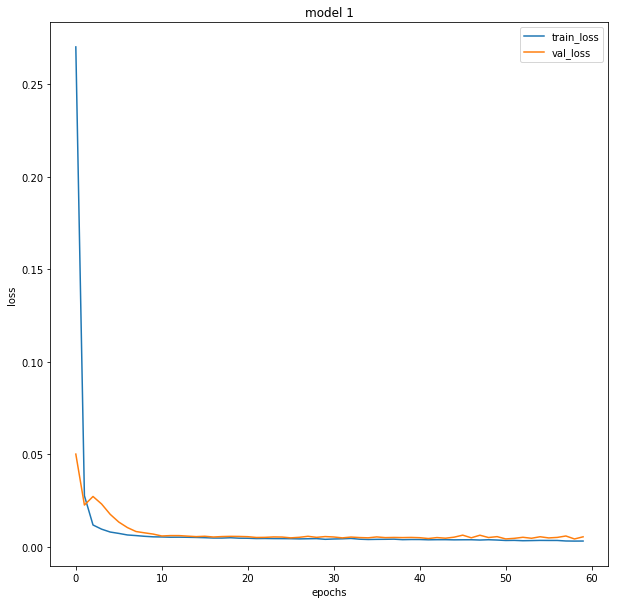

In [6]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_1'].history['loss']
val_loss = hist['model_1'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 1")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 2: Replace GAP layer by flatten layer

In [7]:
## TODO: Specify a CNN architecture

model_2 = Sequential()
model_2.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(y_train.shape[1], ))

# Summarize the model
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [8]:
## TODO: Compile the model
batch_size = 32
epochs = 60

model_2.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_2.h5", verbose = 0, save_best_only = True)
hist['model_2'] = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/60
1712/1712 [==============================] - 2s - loss: 0.4348 - mean_squared_error: 0.4348 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 2/60
1712/1712 [==============================] - 1s - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 3/60
1712/1712 [==============================] - 1s - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 4/60
1712/1712 [==============================] - 1s - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/60
1712/1712 [==============================] - 1s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 6/60
1712/1712 [==============================] - 1s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 7/60
1712/1712 [=

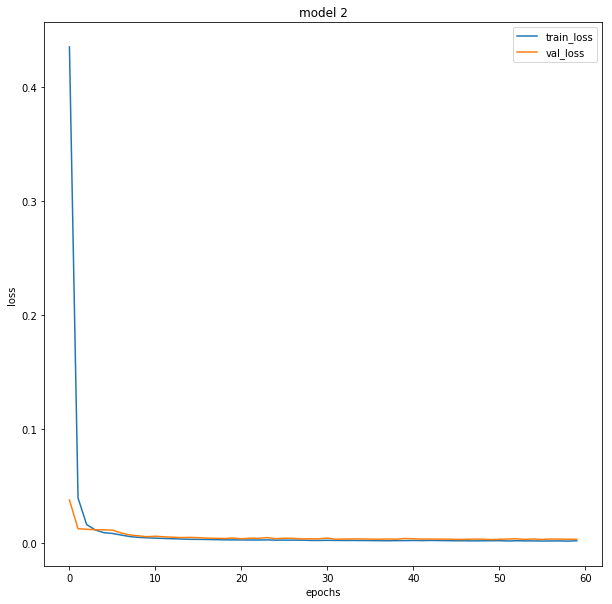

In [9]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_2'].history['loss']
val_loss = hist['model_2'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 2")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 3: Using multiple Maxpooling layers instead of 2x2 strides

In [10]:
## TODO: Specify a CNN architecture

model_3 = Sequential()
model_3.add(Convolution2D(16, (3,3), strides=(1, 1), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(32, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(64, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Convolution2D(128, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(y_train.shape[1], ))

# Summarize the model
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
batch_normalization_11 (Batc (None, 96, 96, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [11]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 60

model_3.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_3.h5", verbose = 0, save_best_only = True)
hist['model_3'] = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/60
1712/1712 [==============================] - 5s - loss: 0.3397 - mean_squared_error: 0.3397 - val_loss: 1.6767 - val_mean_squared_error: 1.6767 4s - loss: 0.8768 - mean_squared_error: 0.87 - ETA: 4s - loss: 0.8394 - mean_squar - ETA: 2s - loss: 0.6368 - mean_squared_error: 0. - ETA: 2s - loss: 0.6012 - mean_squ - ETA: 1s - l
Epoch 2/60
1712/1712 [==============================] - 3s - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 7.5613 - val_mean_squared_error: 7.5613.05 - ETA: 2s - loss: 0.0572 - mean_squared_error:  - ETA: 2s - loss: 0.0552 - mean_squared_e - ETA: 2s - loss: 0.0505 - mean_squared_e - ETA: 1s - loss: 0.0463 - mean_squared_error:  - ETA: 1s - loss: 0.0444 - mean_squared_error: 0.04 - ETA: 1s - loss: 0.0438 -  - ETA: 0s - loss: 0.0373 - mean_squared_error: 0. - ETA: 0s - loss: 0.0365 - mean_squared_error:  - ETA: 0s - loss: 0.0354 - mean_squared_error:  - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.03

1712/1712 [==============================] - 3s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0035 - val_mean_squared_error: 0.0035A: 3s - loss: 0.0017 - mean_s - ETA: 2s - loss: 0.0018 - mean_s - ETA: 1s - loss: 0.0017 - mean_squared_err - ETA: 1s - loss: 0.0017 - mean_squared_error: 0. - ETA: 1s - loss: 0.0017 - mean_squared_error:  - ETA: 1s - loss: 0.0018 - mean_squared_error: 0.00 - ETA: 0s - loss: 0.0018 - mean_squared_error: 0. - ETA: 0s - loss: 0.0018 - mean_squared_error: 0.00 - ETA: 0s - loss: 0.0018 - mean_squared_error - ETA: 0s - loss: 0.0019 - mean_squared_error:  - ETA: 0s - loss: 0.0019 - mean_squared_err
Epoch 34/60
1712/1712 [==============================] - 3s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0033 - val_mean_squared_error: 0.0033 2s - loss: 0.0020 - mean_s - ETA: 1s - loss: 0.0018 - mean_squared_error:  - ETA: 1s - loss: 0.0017 - mean_s - ETA: 1s - loss: 0.0017 - mean_squared_error: 0.00 - ETA: 0s - loss: 0.0017 - mean - ETA: 0s 

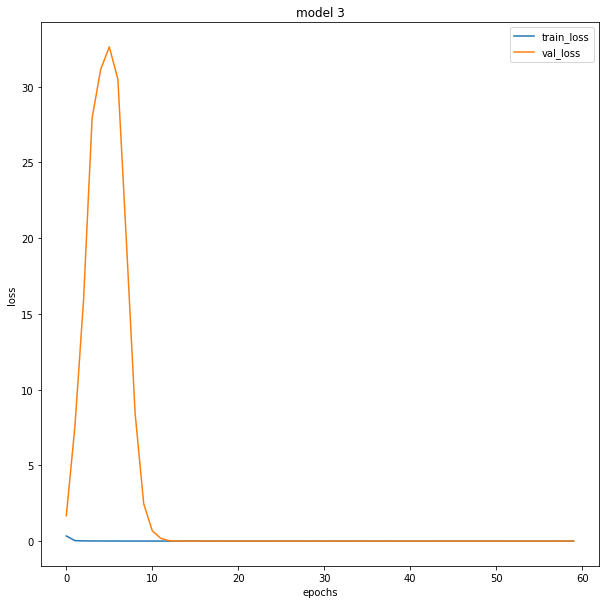

In [12]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_3'].history['loss']
val_loss = hist['model_3'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 3")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Model 4: Increase number of CONV layers and using 2x2 stride instead of Maxpooling

In [25]:
## TODO: Specify a CNN architecture

model_4 = Sequential()
model_4.add(Convolution2D(16, (3,3), strides=(1, 1), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(16, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(32, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(32, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(64, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(64, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(128, (3,3), strides=(1, 1), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Convolution2D(128, (3,3), strides=(2, 2), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dense(y_train.shape[1], ))

# Summarize the model
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 96, 96, 16)        160       
_________________________________________________________________
batch_normalization_52 (Batc (None, 96, 96, 16)        64        
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization_53 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
batch_normalization_54 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 32)        9248      
__________

In [26]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

## TODO: Compile the model
batch_size = 32
epochs = 60

model_4.compile(Adam(), 'mean_squared_error', metrics = ['mse'])
checkpointer = ModelCheckpoint(filepath = "saved_models/model_selection/model_4.h5", verbose = 0, save_best_only = True)
hist['model_4'] = model_4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = [checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/60
1712/1712 [==============================] - 8s - loss: 0.5523 - mean_squared_error: 0.5523 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 2/60
1712/1712 [==============================] - 5s - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 3/60
1712/1712 [==============================] - 5s - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 4/60
1712/1712 [==============================] - 5s - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0123 - val_mean_squared_error: 0.0123- ETA: 1s - loss: 0.0107 - mean_squared_error: 0. - ETA: 1s - loss: 0.0106 - mean_squared_error - ETA: 1s - loss: 0.0105 - mean_squared_err - ETA: 0s - loss: 0.0104 - mean_squared_e
Epoch 5/60
1712/1712 [==============================] - 5s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0108 - val_mean_squared_error: 0.01

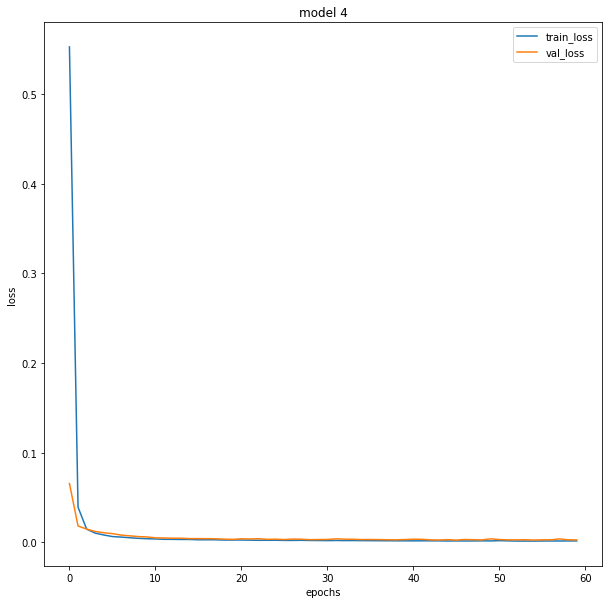

In [27]:
## TODO: Visualize the training and validation loss of your neural network
import matplotlib.pyplot as plt

train_loss = hist['model_4'].history['loss']
val_loss = hist['model_4'].history['val_loss']
model_loss_fig = plt.figure(figsize = (10,10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("model 4")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

# Visualize loss of all model

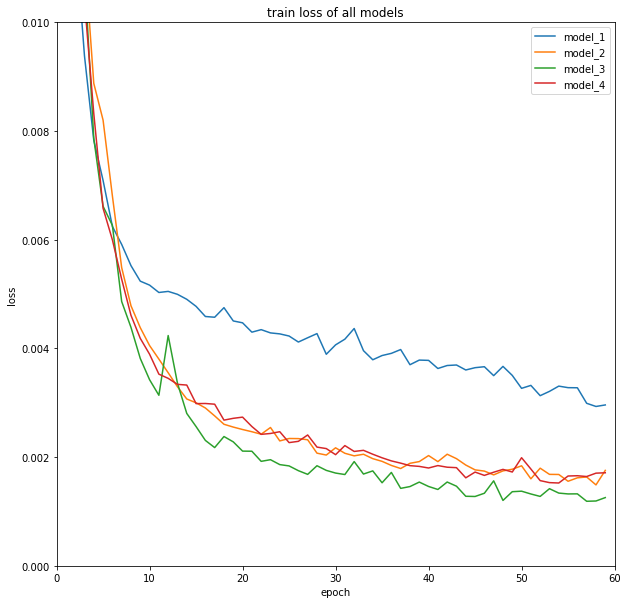

In [28]:
model_names = list(hist.keys())
model_names.sort()
model_loss_fig = plt.figure(figsize = (10,10))
for model_name in model_names:
    plt.plot(hist[model_name].history['loss'])

plt.title('train loss of all models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,60])
plt.ylim([0,0.01])
plt.legend(model_names, loc='upper right')
plt.show()

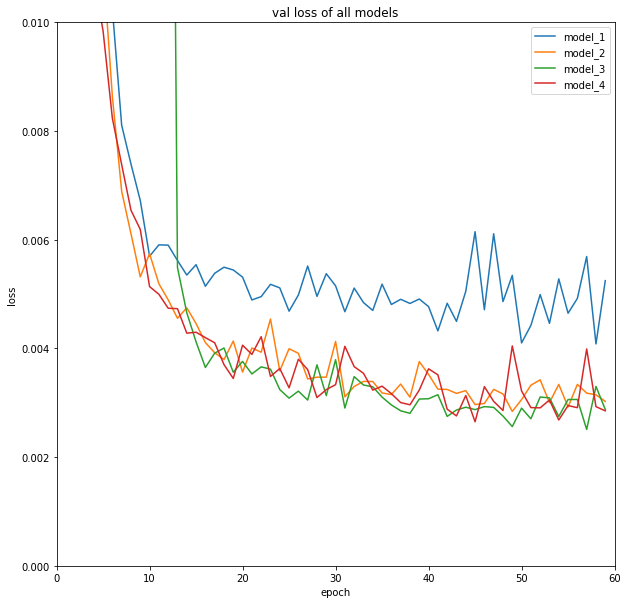

In [29]:
model_names = list(hist.keys())
model_names.sort()
model_loss_fig = plt.figure(figsize = (10,10))
for model_name in model_names:
    plt.plot(hist[model_name].history['val_loss'])

plt.title('val loss of all models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([0,60])
plt.ylim([0,0.01])
plt.legend(model_names, loc='upper right')
plt.show()